In [14]:
#Import pandas and read the csv file opening the raw file of content through github
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

US_data = pd.read_csv(url)

US_data.head(5)



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,629,617,614,616,616,616,617,617,618,618
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,538,541,542,545,550,555,557,562,564,566
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099


In [15]:
#To show each individual state
US_data["Province_State"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [20]:
#Aggregate state counts
#Lat/long should be removed as it doesen't make sense to add them, each individual value represents a new covid-19 case therefore it shall be dropped
state_data_summed = US_data.groupby("Province_State").sum()

df = state_data_summed.drop(["Lat", "Long_"], axis = 1).reset_index()
df.head(5)


,Province_State,UID,code3,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
0,Alabama,5796241491,57960,241491.0,0,0,0,0,0,0,...,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565
1,Alaska,2604232344,26040,232344.0,0,0,0,0,0,0,...,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012
2,American Samoa,16,16,60.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,1428230216,14280,230216.0,0,0,0,0,1,1,...,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002
4,Arkansas,6468550635,64680,550635.0,0,0,0,0,0,0,...,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804


In [23]:
#Plot confirmed covid cases in selected US states over time
States_to_plot = ["Alabama", "Massachusetts", "Kentucky", "Washington", "Wyoming"]

start_date = "01/22/2020"
end_date = "09/10/2020"

You should consider upgrading via the 'c:\users\markus\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


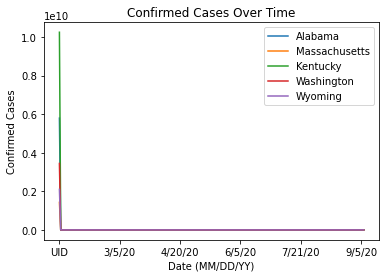

In [36]:
!pip install matplotlib
import sys
import matplotlib.pyplot as plt
import datetime

def get_index_from_date(date_string):
    first_date = datetime.datetime(2020, 1, 22)
    
    date_list = [int(x) for x in date_string.split("/")]
    date_object = datetime.datetime(date_list[-1], date_list[0], date_list[1])
    
    return (date_object-first_date).days

dates = list(df)[1:]

start_index = get_index_from_date(start_date)
end_index = get_index_from_date(end_date)

x_values = dates[start_index:end_index+1]

for state in States_to_plot:
    state_df = df[df['Province_State'] == state]
    y_values = [int(state_df[col]) for col in x_values]
    plt.plot(x_values, y_values, label=state)
    
plt.title('Confirmed Cases Over Time')
skip = max(len(x_values)//5, 1)
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YY)")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

